In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
tDaily_gen = pd.read_csv("tDaily_gen.csv",parse_dates=['Datetime'],index_col=['Datetime'])
tDaily_ny_gen = pd.read_csv("tDaily_ny_gen.csv",parse_dates=['Datetime'],index_col=['Datetime'])
tDaily_ny_covid = pd.read_csv("tDaily_ny_covid.csv",parse_dates=['Datetime'],index_col=['Datetime'])

In [3]:
#corr = tDaily_gen.corr()
#print(corr)
# clustergrid = sns.clustermap(corr,annot=True)

In [4]:
#print(tDaily_gen)

In [5]:
# read in the data from the structured sources.....
# start with just the nyc data per day 
def parser(date):  
    return pd.to_datetime(date,utc=True)

nyc_actual = pd.read_csv("../coronavirus-data/case-hosp-death.csv",parse_dates=['DATE_OF_INTEREST'],date_parser=parser,index_col=['DATE_OF_INTEREST'])
nyc_actual.head()


,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-02-29 00:00:00+00:00,1,14,0
2020-03-01 00:00:00+00:00,1,4,0
2020-03-02 00:00:00+00:00,0,22,0
2020-03-03 00:00:00+00:00,2,20,0
2020-03-04 00:00:00+00:00,5,22,0


In [6]:
nyc_self = nyc_actual.corr()
print(nyc_self)

                    CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT
CASE_COUNT            1.000000            0.953366     0.752953
HOSPITALIZED_COUNT    0.953366            1.000000     0.800798
DEATH_COUNT           0.752953            0.800798     1.000000


In [7]:
print(nyc_actual.dtypes)

CASE_COUNT            int64
HOSPITALIZED_COUNT    int64
DEATH_COUNT           int64
dtype: object


In [8]:
# merge the structured and unstructured data 
merged = pd.merge(left=nyc_actual, right=tDaily_gen, left_index=True,right_index=True)
print(merged)

                           CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  \
2020-02-29 00:00:00+00:00           1                  14            0   
2020-03-01 00:00:00+00:00           1                   4            0   
2020-03-02 00:00:00+00:00           0                  22            0   
2020-03-03 00:00:00+00:00           2                  20            0   
2020-03-04 00:00:00+00:00           5                  22            0   
...                               ...                 ...          ...   
2020-04-29 00:00:00+00:00        2334                 419          200   
2020-04-30 00:00:00+00:00        2003                 329          184   
2020-05-01 00:00:00+00:00        1863                 365          171   
2020-05-02 00:00:00+00:00        1047                 267          160   
2020-05-03 00:00:00+00:00         776                 238          146   

                              senti  weightedSenti  rolling_sum  \
2020-02-29 00:00:00+00:00  0.290323       0.

                      CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT     senti  \
CASE_COUNT              1.000000            0.948661     0.730299  0.335808   
HOSPITALIZED_COUNT      0.948661            1.000000     0.782964  0.264011   
DEATH_COUNT             0.730299            0.782964     1.000000  0.250089   
senti                   0.335808            0.264011     0.250089  1.000000   
weightedSenti           0.247279            0.207066     0.156832  0.199905   
rolling_sum             0.344551            0.267289     0.252578  0.996191   
rolling_sum_weighted    0.251371            0.210283     0.160111  0.206899   

                      weightedSenti  rolling_sum  rolling_sum_weighted  
CASE_COUNT                 0.247279     0.344551              0.251371  
HOSPITALIZED_COUNT         0.207066     0.267289              0.210283  
DEATH_COUNT                0.156832     0.252578              0.160111  
senti                      0.199905     0.996191              0.206899  
we

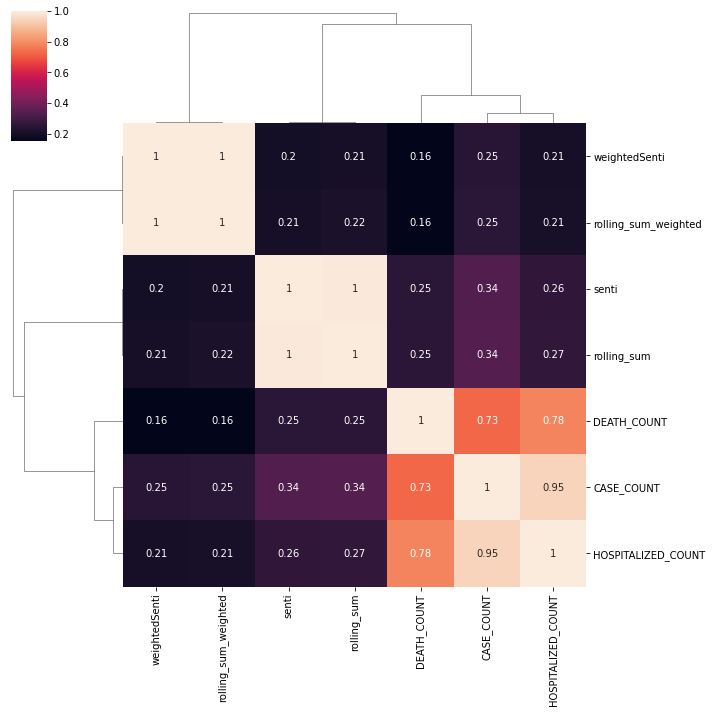

In [9]:
corrMerge = merged.corr()
print(corrMerge)
clustergrid = sns.clustermap(corrMerge,annot=True)

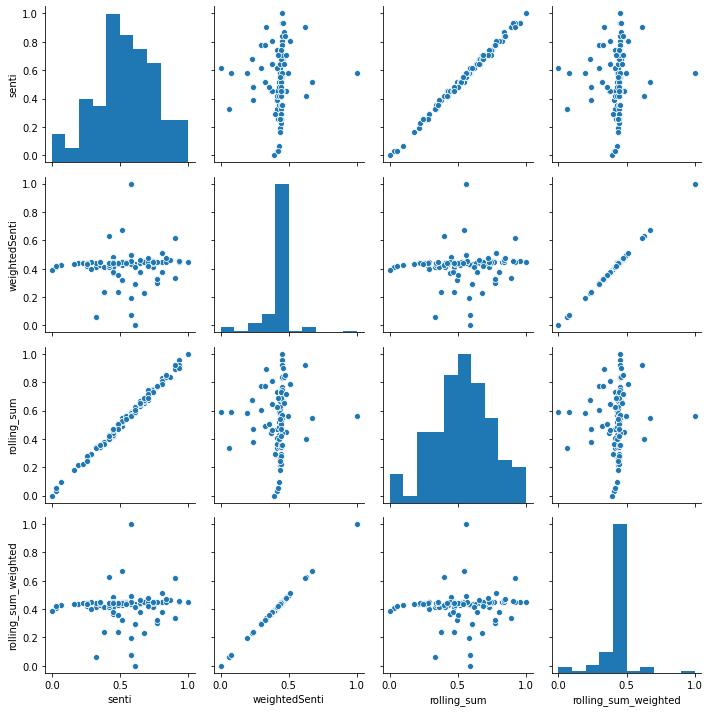

In [10]:
sns.pairplot(tDaily_ny_gen, height=2.5)
plt.tight_layout()

In [11]:
merged.head()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,senti,weightedSenti,rolling_sum,rolling_sum_weighted
2020-02-29 00:00:00+00:00,1,14,0,0.290323,0.603039,0.290323,0.564350
2020-03-01 00:00:00+00:00,1,4,0,0.419355,0.585566,0.408602,0.575300
2020-03-02 00:00:00+00:00,0,22,0,0.516129,0.681263,0.516129,0.669942
2020-03-03 00:00:00+00:00,2,20,0,0.322581,0.588953,0.333333,0.580419
2020-03-04 00:00:00+00:00,5,22,0,0.451613,0.601223,0.440860,0.590911


In [12]:
nytDaily_gen = pd.read_csv('nytDaily_gen.csv',parse_dates=['date'],date_parser=parser,index_col=['date'])
nytDaily_covid = pd.read_csv('nytDaily_covid.csv',parse_dates=['date'],date_parser=parser,index_col=['date'])


In [13]:
nytDaily_gen.head()

,scA,scH,scL,scComb,rolling_sum
date,,,,,
2020-01-21 00:00:00+00:00,0.000000,1.000000,1.000000,2.000000,NaN
2020-01-22 00:00:00+00:00,0.333333,0.333333,0.666667,1.333333,4.333333
2020-01-23 00:00:00+00:00,1.000000,1.000000,0.000000,2.000000,6.000000
2020-01-24 00:00:00+00:00,1.000000,1.000000,1.000000,3.000000,6.000000
2020-01-25 00:00:00+00:00,0.750000,0.750000,1.000000,2.500000,7.750000


In [14]:
fullMerge = pd.merge(left=merged, right=nytDaily_gen, left_index=True,right_index=True)

In [15]:
fullMerge.head()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,senti,weightedSenti,rolling_sum_x,rolling_sum_weighted,scA,scH,scL,scComb,rolling_sum_y
2020-02-29 00:00:00+00:00,1,14,0,0.290323,0.603039,0.290323,0.564350,0.000000,1.000000,0.000000,1.000000,5.000000
2020-03-01 00:00:00+00:00,1,4,0,0.419355,0.585566,0.408602,0.575300,0.000000,0.000000,0.000000,0.000000,2.000000
2020-03-02 00:00:00+00:00,0,22,0,0.516129,0.681263,0.516129,0.669942,0.666667,0.333333,0.666667,1.666667,2.666667
2020-03-03 00:00:00+00:00,2,20,0,0.322581,0.588953,0.333333,0.580419,1.000000,0.500000,0.750000,2.250000,6.750000
2020-03-04 00:00:00+00:00,5,22,0,0.451613,0.601223,0.440860,0.590911,NaN,NaN,NaN,NaN,NaN


                      CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT     senti  \
CASE_COUNT              1.000000            0.948661     0.730299  0.335808   
HOSPITALIZED_COUNT      0.948661            1.000000     0.782964  0.264011   
DEATH_COUNT             0.730299            0.782964     1.000000  0.250089   
senti                   0.335808            0.264011     0.250089  1.000000   
weightedSenti           0.247279            0.207066     0.156832  0.199905   
rolling_sum_x           0.344551            0.267289     0.252578  0.996191   
rolling_sum_weighted    0.251371            0.210283     0.160111  0.206899   
scA                     0.036776            0.047277    -0.033048  0.035704   
scH                    -0.032656           -0.060240    -0.013586  0.088440   
scL                     0.218630            0.262016     0.373607  0.168980   
scComb                  0.116162            0.130070     0.171385  0.151488   
rolling_sum_y           0.027626            0.061049

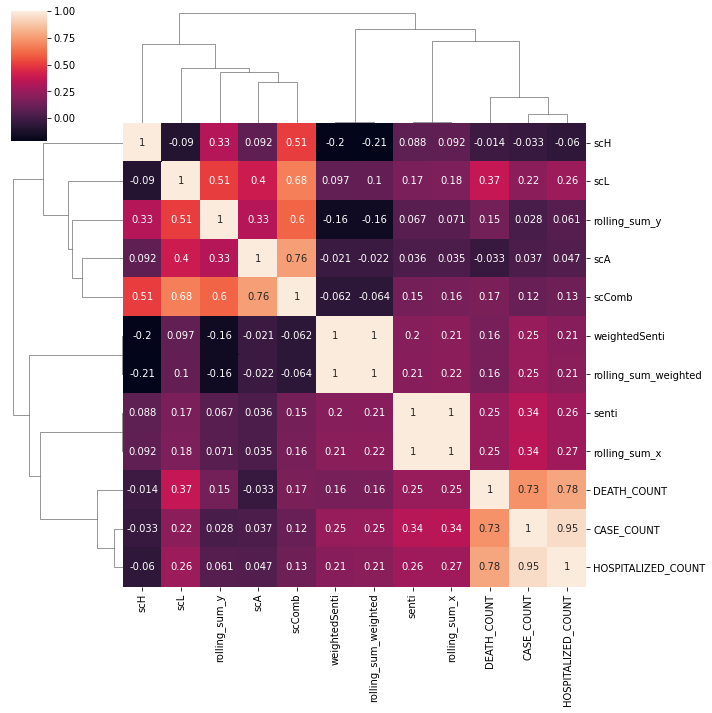

In [16]:
corrFM = fullMerge.corr()
print(corrFM)
clustergrid = sns.clustermap(corrFM,annot=True)

In [51]:
# coor map shows us that there is strongest correlation between....
# senti/rolling sum and case count
# scL and DeathCount
# scL and rolling sum
# so we can drop everything else
tDaily_gen = tDaily_gen.drop(columns=['senti','weightedSenti','rolling_sum_weighted'])
tDaily_ny_gen = tDaily_ny_gen.drop(columns=['senti','weightedSenti','rolling_sum_weighted'])
tDaily_ny_covid = tDaily_ny_covid.drop(columns=['senti','weightedSenti','rolling_sum_weighted'])


nytDaily_gen = nytDaily_gen.drop(columns=['scA','scH','scComb','rolling_sum'])
nytDaily_covid = nytDaily_covid.drop(columns=['scA','scH','scComb','rolling_sum'])

KeyError: "['senti' 'weightedSenti' 'rolling_sum_weighted'] not found in axis"

In [210]:
tDaily_gen = tDaily_gen.rename(columns={'rolling_sum':'t_gen'})
tDaily_ny_gen = tDaily_ny_gen.rename(columns={'rolling_sum':'t_ny_gen'})
tDaily_ny_covid = tDaily_ny_covid.rename(columns={'rolling_sum':'t_ny_covid'})

nytDaily_gen = nytDaily_gen.rename(columns={'scL':'nyt_gen'})
nytDaily_covid = nytDaily_covid.rename(columns={'scL':'nyt_covid'})

In [211]:
df = [nyc_actual, tDaily_gen, tDaily_ny_covid, nytDaily_gen, nytDaily_covid]

In [212]:
from functools import reduce


In [213]:
df_merged = reduce(lambda  left,right: pd.merge(left, right, left_index=True,right_index=True), df)
df_merged = df_merged.interpolate(method='linear')
#from scipy import stats
#df_merged['nyt_gen'] = df_merged['nyt_gen'][df_merged['nyt_gen'].between(df_merged['nyt_gen'].quantile(.15), df_merged['nyt_gen'].quantile(.85))] # without outliers
#df_merged['t_gen'] = df_merged['t_gen'][df_merged['t_gen'].between(df_merged['t_gen'].quantile(.15), df_merged['t_gen'].quantile(.85))] # without outliers

In [214]:
print(df_merged[15:20])

                           CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  \
2020-03-15 00:00:00+00:00        1032                 192            6   
2020-03-16 00:00:00+00:00        2122                 307            9   
2020-03-17 00:00:00+00:00        2453                 355            8   
2020-03-18 00:00:00+00:00        2976                 468           20   
2020-03-19 00:00:00+00:00        3706                 552           24   

                              t_gen  t_ny_covid  nyt_gen  nyt_covid  
2020-03-15 00:00:00+00:00  0.548387    0.386861     0.25   0.000000  
2020-03-16 00:00:00+00:00  0.580645    0.560369     0.50   0.500000  
2020-03-17 00:00:00+00:00  0.838710    0.810219     1.00   0.200000  
2020-03-18 00:00:00+00:00  0.462366    0.544620     0.50   0.666667  
2020-03-19 00:00:00+00:00  0.838710    0.177781     0.00   0.625000  


In [215]:
nyc_actual.head()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-02-29 00:00:00+00:00,1,14,0
2020-03-01 00:00:00+00:00,1,4,0
2020-03-02 00:00:00+00:00,0,22,0
2020-03-03 00:00:00+00:00,2,20,0
2020-03-04 00:00:00+00:00,5,22,0


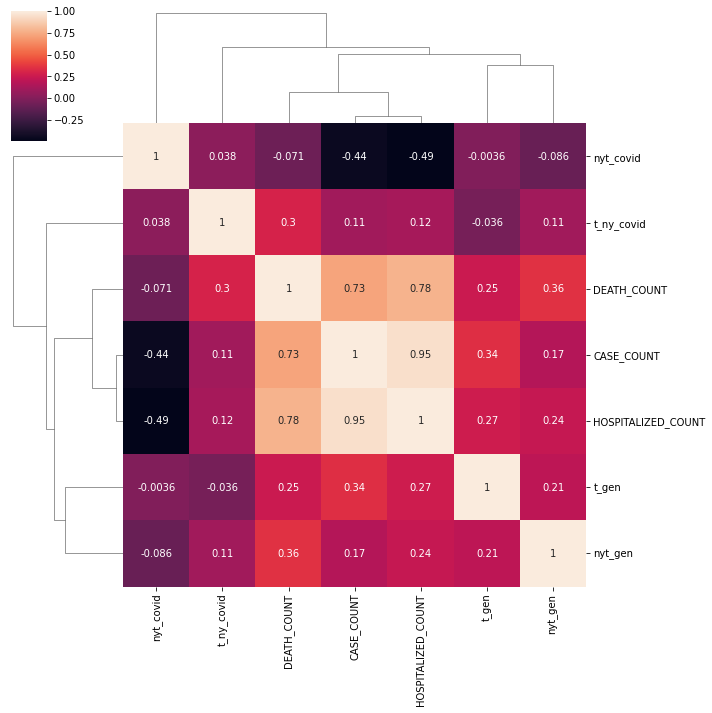

In [216]:
corr_all = df_merged.corr()

clustergrid = sns.clustermap(corr_all,annot=True)

In [217]:
# lets use the t_gen to predict case count, and the nyt_gen/t_ny_covid to predict death count 
# mybe we can get better corrleations by combining somehting? 
df_merged['x_factor'] = df_merged['nyt_gen'].multiply(df_merged['t_gen'])

def inverse(x):
    if x is None: 
        return None
    else:
        return 1-x
    
df_merged['x_factor_inv'] = df_merged['x_factor'].apply(lambda x : inverse(x))
df_merged['t_gen_inv'] = df_merged['t_gen_inv'].apply(lambda x : inverse(x))


KeyError: 't_gen_inv'

In [218]:
df_merged.head()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,t_gen,t_ny_covid,nyt_gen,nyt_covid,x_factor,x_factor_inv
2020-02-29 00:00:00+00:00,1,14,0,0.290323,0.535364,0.000000,NaN,0.000000,1.000000
2020-03-01 00:00:00+00:00,1,4,0,0.408602,0.397289,0.000000,NaN,0.000000,1.000000
2020-03-02 00:00:00+00:00,0,22,0,0.516129,0.181155,0.666667,NaN,0.344086,0.655914
2020-03-03 00:00:00+00:00,2,20,0,0.333333,0.673966,0.750000,NaN,0.250000,0.750000
2020-03-04 00:00:00+00:00,5,22,0,0.440860,0.343066,0.625000,NaN,0.275538,0.724462


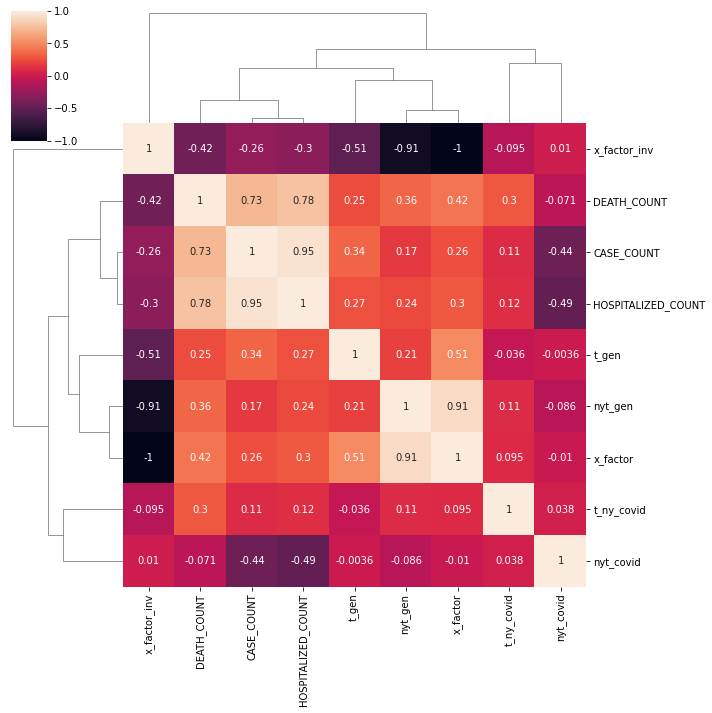

In [219]:
corr_all = df_merged.corr()
clustergrid = sns.clustermap(corr_all,annot=True)

In [196]:
# FINAL OPINION:
# for correlating the death count, the x_factor_cases is the best
# for correlating the case count, the t_gen is the best
# lets save something here
#df_merged.to_csv('df_merged_tweet_nyt_caseNumbers.csv')

In [197]:
# lets train a model with it. 
import matplotlib.pyplot as plt
import seaborn as sns


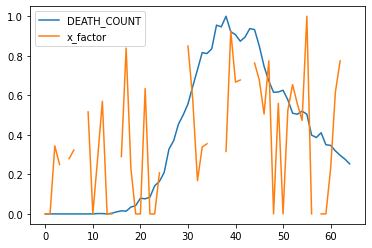

In [199]:
#plot(df['x_factor'],df['DEATH_COUNT'])
# remove the outliers
df_normal.plot(y=['DEATH_COUNT','x_factor'],use_index=True)

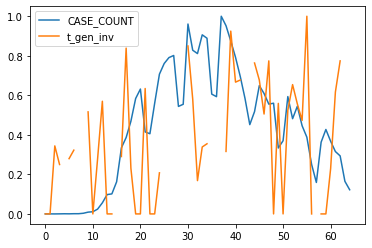

In [201]:
df_normal.plot(y=['CASE_COUNT','t_gen_inv'],use_index=True)

In [198]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_normal = min_max_scaler.fit_transform(df_merged)
df_normal = pd.DataFrame(df_normal,columns=["CASE_COUNT",'HOSPITALIZED_COUNT','DEATH_COUNT','t_gen','t_ny_covid','nyt_gen','nyt_covid','x_factor','x_factor_inv','t_gen_inv'])
print(df_normal)

    CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT     t_gen  t_ny_covid  \
0     0.000158            0.005935     0.000000  0.057143    0.465083   
1     0.000158            0.000000     0.000000  0.214286    0.306122   
2     0.000000            0.010682     0.000000  0.357143    0.057296   
3     0.000315            0.009496     0.000000  0.114286    0.624650   
4     0.000788            0.010682     0.000000  0.257143    0.243697   
..         ...                 ...          ...       ...         ...   
60    0.367675            0.246291     0.346620  0.585714    0.499160   
61    0.315532            0.192878     0.318891  0.900000    0.297479   
62    0.293478            0.214243     0.296360  0.700000    0.428571   
63    0.164934            0.156083     0.277296  0.457143    0.579832   
64    0.122243            0.138872     0.253033  0.471429    0.670588   

     nyt_gen  nyt_covid  x_factor  x_factor_inv  t_gen_inv  
0   0.000000        NaN  0.000000      1.000000   0.000000  
1

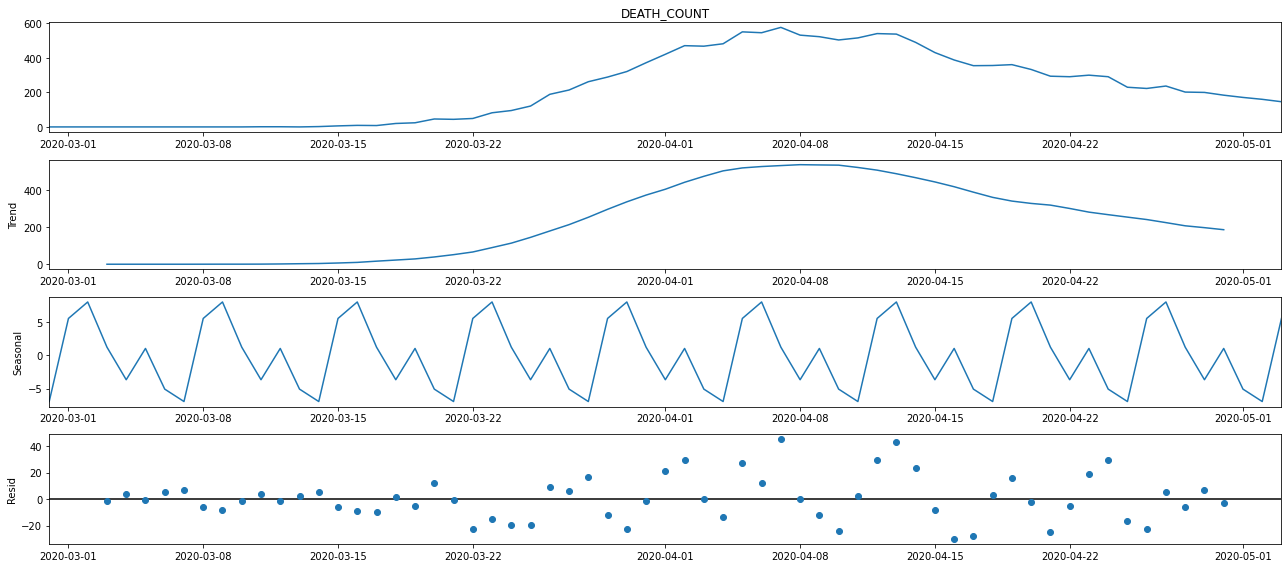

In [223]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 18, 8

y = df_merged['DEATH_COUNT']

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [225]:
'''p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
'''
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [241]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:913.2950475273442
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:719.7793099873587
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:714.5855647519928
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:560.1301155903454
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:724.8491706094273
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:707.2954348706536
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:574.9953166287231


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:560.6766596856037
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:822.5154939888224
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:644.8654139803355


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:639.0798219827968


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:498.77695106647803
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:660.1586348800869


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:633.1506947901149
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:524.3058261762301


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:501.1192077990694
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:595.8955004745881
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:495.1752143626387
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:521.2490616118781
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:395.9451670770832


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:503.8593427899545
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:497.17213656760293
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:413.6908690741233


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:397.9515871660163
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:577.945565350119
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:479.2524908247039
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:503.6261835302969


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:377.08845579351663
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:496.23595174494557
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:481.22040325838645


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:405.8581542357525


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:379.08729721833316
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:606.2777645343015
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:505.7513242728953


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:532.222939786442
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:406.7722364333645
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:505.80525034116835


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:507.74410047330093
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:415.67959192400673


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:408.7721317390965
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:588.21791232114


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning

ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:489.73926836082376
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:514.227694778021
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:390.02659918585164
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:498.1344852017466


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:491.6858913075883
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:407.7961347205169


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:392.0252134436254
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:579.983714921702
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:482.7676872257304
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:506.6495119351751


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:384.38136605332676
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:482.71323967931994
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:484.712289357098
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:390.59074714774596


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:386.3777779380692
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:567.5331330802221
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:471.5236520390299
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:495.9258141179987


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:370.8249781548297
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:479.85917875400594


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:473.47489396674155
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:387.39150823288884


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:372.81082188769756


In [242]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:370.8249781548297

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9107      0.092      9.924      0.000       0.731       1.091
ma.L1         -0.6157      0.190     -3.245      0.001      -0.988      -0.244
ma.S.L12      -1.0000      0.247     -4.051      0.000      -1.484      -0.516
sigma2       611.6200      0.000   1.52e+06      0.000     611.619     611.621


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


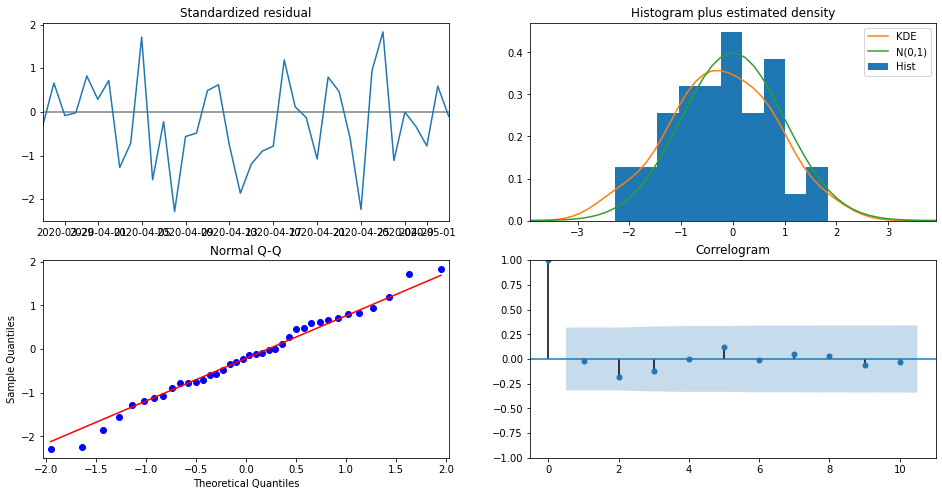

In [243]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [250]:
pred = results.get_prediction()
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The Root Mean Error Ratio is roughly {}%'.format((round(np.sqrt(mse),2)/600)*100))

The Mean Squared Error of our forecasts is 541.65
The Root Mean Squared Error of our forecasts is 23.27
The Root Mean Error Ratio is roughly 3.878333333333333%


METRICS
MAE 140.44615109369096
MSE 28372.1581728285
RMSE 168.440369783578
R squared error 0.25884688109090104


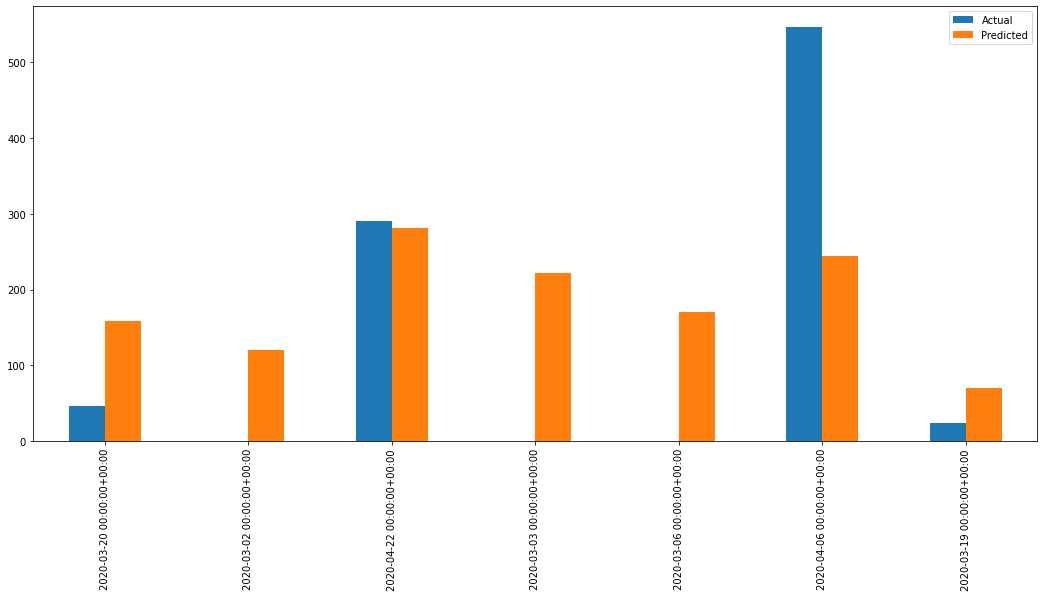

In [273]:
X = df_merged.drop(columns=['nyt_covid','DEATH_COUNT','CASE_COUNT','HOSPITALIZED_COUNT'])
y = df_merged['DEATH_COUNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

lm = LinearRegression()
lm.fit(X_train,y_train)
prediction = lm.predict(X_test)
#plt.scatter(y_test,prediction)

df = pd.DataFrame({'Actual':y_test,'Predicted':prediction})
df.plot(kind = 'bar')

print("METRICS")
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R squared error', r2_score(y_test, prediction))


In [267]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

ModuleNotFoundError: No module named 'autosklearn'